In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [3]:
#loading data
data=pd.read_excel("F://SEM 7//SET-1//DATA//Adidas US Sales Datasets.xlsx")

In [4]:
#cleaning data
data = data.drop('Unnamed: 0',axis=1)
data = data.drop(labels=[0,1,2], axis=0)
data.columns = data.iloc[0]
data = data.drop(labels=3, axis=0)
data = data.reset_index(drop=True)
data

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [5]:
#converting categorical data into numeric
data['Region']=pd.factorize(data.Region)[0]
data['State']=pd.factorize(data.State)[0]
data['City']=pd.factorize(data.City)[0]
data['Product']=pd.factorize(data.Product)[0]
data['Retailer']=pd.factorize(data.Retailer)[0]
data['Sales Method']=pd.factorize(data['Sales Method'])[0]
data.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,1185732,2020-01-01 00:00:00,0,0,0,0,50,1200,600000,300000,0.5,0
1,0,1185732,2020-01-02 00:00:00,0,0,0,1,50,1000,500000,150000,0.3,0
2,0,1185732,2020-01-03 00:00:00,0,0,0,2,40,1000,400000,140000,0.35,0
3,0,1185732,2020-01-04 00:00:00,0,0,0,3,45,850,382500,133875,0.35,0
4,0,1185732,2020-01-05 00:00:00,0,0,0,4,60,900,540000,162000,0.3,0


In [6]:
#dropping unnecessary columns
data = data.drop('Retailer ID',axis=1)
data = data.drop('Invoice Date',axis=1)
data.head()

3,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,0,0,0,0,50,1200,600000,300000,0.5,0
1,0,0,0,0,1,50,1000,500000,150000,0.3,0
2,0,0,0,0,2,40,1000,400000,140000,0.35,0
3,0,0,0,0,3,45,850,382500,133875,0.35,0
4,0,0,0,0,4,60,900,540000,162000,0.3,0


In [7]:
#converting object data type to numeric
data['Units Sold'] = data['Units Sold'].astype(int)
data['Total Sales'] = data['Total Sales'].astype(int)
data['Operating Profit'] = data['Operating Profit'].astype(int)
data['Retailer'] = data['Retailer'].astype(int)
data['Price per Unit'] = data['Price per Unit'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   int32 
 1   Region            9648 non-null   int64 
 2   State             9648 non-null   int64 
 3   City              9648 non-null   int64 
 4   Product           9648 non-null   int64 
 5   Price per Unit    9648 non-null   int32 
 6   Units Sold        9648 non-null   int32 
 7   Total Sales       9648 non-null   int32 
 8   Operating Profit  9648 non-null   int32 
 9   Operating Margin  9648 non-null   object
 10  Sales Method      9648 non-null   int64 
dtypes: int32(5), int64(5), object(1)
memory usage: 640.8+ KB


In [8]:
corr=data.corr()
print(corr)

3                 Retailer    Region     State      City   Product  \
3                                                                    
Retailer          1.000000 -0.097952  0.096816  0.096194  0.002262   
Region           -0.097952  1.000000 -0.209003 -0.176060 -0.000121   
State             0.096816 -0.209003  1.000000  0.976045  0.000367   
City              0.096194 -0.176060  0.976045  1.000000  0.000393   
Product           0.002262 -0.000121  0.000367  0.000393  1.000000   
Price per Unit    0.058250  0.042659 -0.148991 -0.144364  0.189452   
Units Sold        0.007130  0.095324 -0.251792 -0.244089 -0.177418   
Total Sales       0.016339  0.079305 -0.158281 -0.151011 -0.055138   
Operating Profit  0.012788  0.072539 -0.145209 -0.137264 -0.054475   
Operating Margin  0.001682 -0.002096 -0.019765 -0.023920  0.010860   
Sales Method     -0.005612  0.130336 -0.013363 -0.011398 -0.000524   

3                 Price per Unit  Units Sold  Total Sales  Operating Profit  \
3         

Text(0.5, 1.0, 'Correlation heat map')

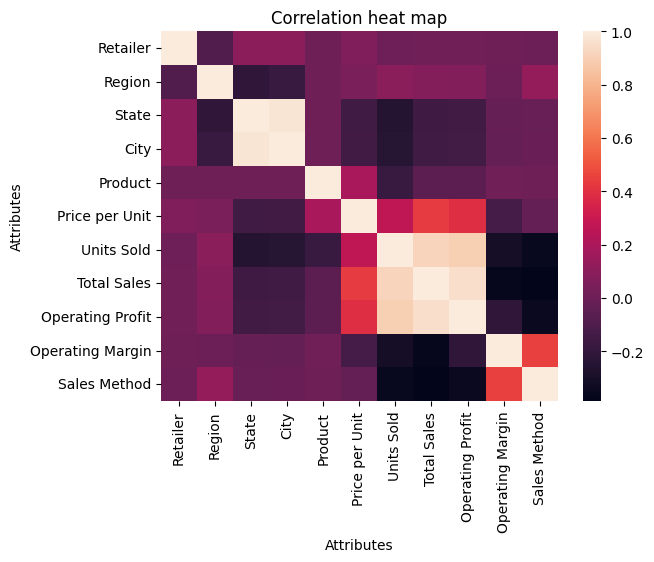

In [9]:
sns.heatmap(data.corr())
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.title("Correlation heat map")

**We can see that Total Sales has a high colleration with operating profit, price per unit and units sold. 
But on the other hand, features like Region and retailer can make a negative impact on the Total sales amount.**

In [10]:
#assigning independent attributes to X and dependent attribute to Y
X= data.values[:,(0,1,2,3,4,5,6,8,9,10)]
Y= data.values[:, 7]

In [11]:
#Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [12]:
lr= LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [13]:
r2=r2_score(y_test, y_pred)
r2

0.9587817258051731

In [14]:
data2=data[['Total Sales']].copy()
data2['sales_pred']= lr.predict(X)
dt=pd.DataFrame(data2)
print(dt)

3     Total Sales     sales_pred
0          600000  702967.828600
1          500000  450249.431821
2          400000  416114.564820
3          382500  383333.307945
4          540000  464007.275945
...           ...            ...
9643         3200   37832.416602
9644         4305   31891.419730
9645         7544   33916.769542
9646         2940    2525.341128
9647         2407   22631.783026

[9648 rows x 2 columns]


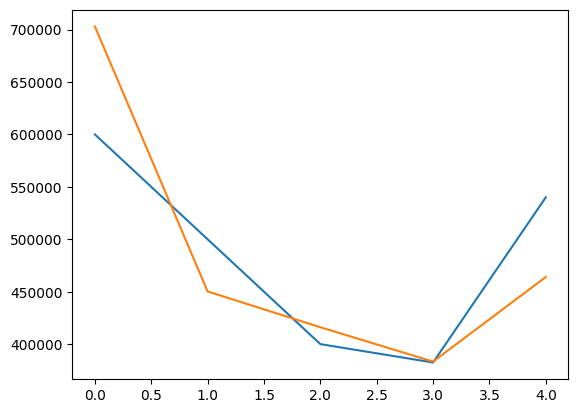

In [15]:
plt.plot(dt.head())

In [16]:
top_pr=data[['Product','Total Sales']].groupby('Product').sum()
top_pr

3,Total Sales
Product,
0,208826167
1,153673673
2,128002797
3,106631855
4,123728529
5,179038772
